In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/loaneraccount/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/loaneraccount/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/loaneraccount/nltk_data...


True

In [2]:
df = pd.read_csv('20191226-reviews.csv')
print(df.shape)

(67986, 8)


### Quick EDA

In [5]:
df.head()

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


In [25]:
df['row_id']= [x+1 for x in range(len(df))]

In [26]:
df

,asin,name,rating,date,verified,title,body,helpfulVotes,row_id
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,1
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,2
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,3
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,4
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,5
...,...,...,...,...,...,...,...,...,...
67981,B081H6STQQ,jande,5,"August 16, 2019",False,"Awesome Phone, but finger scanner is a big mis...",I love the camera on this phone. The screen is...,1.0,67982
67982,B081H6STQQ,2cool4u,5,"September 14, 2019",False,Simply Amazing!,I've been an Xperia user for several years and...,1.0,67983
67983,B081H6STQQ,simon,5,"July 14, 2019",False,"great phon3, but many bugs need to fix. still ...",buy one more for my cousin,NaN,67984
67984,B081TJFVCJ,Tobiasz Jedrysiak,5,"December 24, 2019",True,Phone is like new,Product looks and works like new. Very much re...,NaN,67985


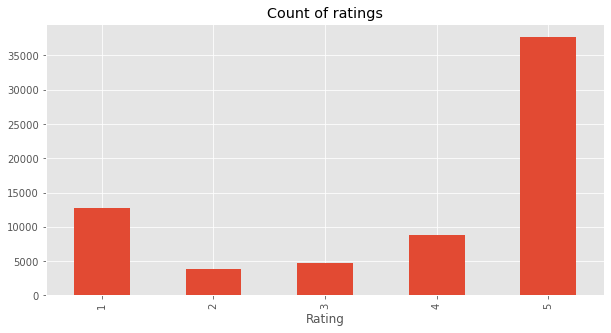

In [6]:
ax = df['rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of ratings',
          figsize=(10, 5))
ax.set_xlabel('Rating')
plt.show()

In [7]:
example = df['body'][50]
print(example)

This is not a "boost" phone and will not work as a GPS with Boost. Had to send it back. A huge pain for something that is $24. This is a rip-off.


In [12]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'is', 'not', 'a', '``', 'boost', "''", 'phone', 'and', 'will']

In [15]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('a', 'DT'),
 ('``', '``'),
 ('boost', 'NN'),
 ("''", "''"),
 ('phone', 'NN'),
 ('and', 'CC'),
 ('will', 'MD')]

In [18]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [19]:
sia.polarity_scores(example)

{'neg': 0.099, 'neu': 0.751, 'pos': 0.15, 'compound': 0.1779}

## Running Polarity scores on entire dataset

In [30]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = str(row['body'])
    myid = row['row_id']
    res[myid] = sia.polarity_scores(text)

         

  0%|          | 0/67986 [00:00<?, ?it/s]

In [40]:
res

{1: {'neg': 0.08, 'neu': 0.816, 'pos': 0.105, 'compound': 0.8629},
 2: {'neg': 0.02, 'neu': 0.876, 'pos': 0.104, 'compound': 0.886},
 3: {'neg': 0.051, 'neu': 0.846, 'pos': 0.103, 'compound': 0.7992},
 4: {'neg': 0.0, 'neu': 0.844, 'pos': 0.156, 'compound': 0.9592},
 5: {'neg': 0.066, 'neu': 0.814, 'pos': 0.121, 'compound': 0.7745},
 6: {'neg': 0.068, 'neu': 0.782, 'pos': 0.15, 'compound': 0.7066},
 7: {'neg': 0.037, 'neu': 0.777, 'pos': 0.186, 'compound': 0.9805},
 8: {'neg': 0.0, 'neu': 0.912, 'pos': 0.088, 'compound': 0.6705},
 9: {'neg': 0.038, 'neu': 0.727, 'pos': 0.234, 'compound': 0.8953},
 10: {'neg': 0.03, 'neu': 0.87, 'pos': 0.1, 'compound': 0.6486},
 11: {'neg': 0.071, 'neu': 0.751, 'pos': 0.178, 'compound': 0.9894},
 12: {'neg': 0.052, 'neu': 0.871, 'pos': 0.077, 'compound': 0.5457},
 13: {'neg': 0.121, 'neu': 0.791, 'pos': 0.088, 'compound': -0.9237},
 14: {'neg': 0.031, 'neu': 0.827, 'pos': 0.142, 'compound': 0.9556},
 15: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 

In [36]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'row_id'})
vaders = vaders.merge(df, how='left')

In [38]:
vaders.head()

,row_id,neg,neu,pos,compound,asin,name,rating,date,verified,title,body,helpfulVotes
0,1,0.080,0.816,0.105,0.8629,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,2,0.020,0.876,0.104,0.8860,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,3,0.051,0.846,0.103,0.7992,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,4,0.000,0.844,0.156,0.9592,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,5,0.066,0.814,0.121,0.7745,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


## Plotting Vader results

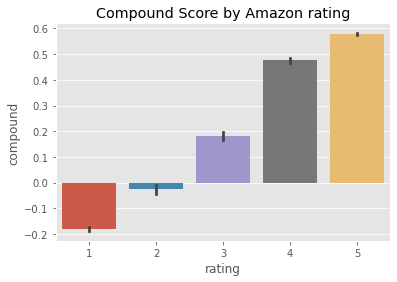

In [41]:
ax = sns.barplot(data=vaders, x='rating', y='compound')
ax.set_title('Compound Score by Amazon rating')
plt.show()

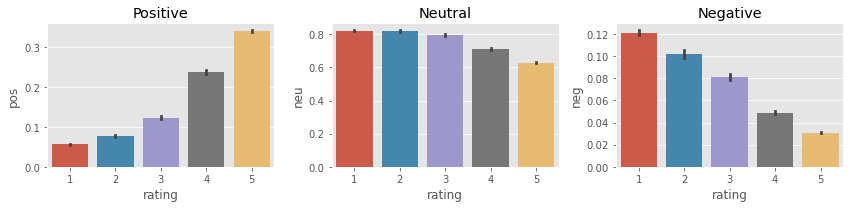

In [42]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [45]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [58]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

ImportError: 
AutoModelForSequenceClassification requires the PyTorch library but it was not found in your environment.
However, we were able to find a TensorFlow installation. TensorFlow classes begin
with "TF", but are otherwise identically named to our PyTorch classes. This
means that the TF equivalent of the class you tried to import would be "TFAutoModelForSequenceClassification".
If you want to use TensorFlow, please use TF classes instead!

If you really do want to use PyTorch please go to
https://pytorch.org/get-started/locally/ and follow the instructions that
match your environment.
